### Prudhviraj Tirumanisetti 
EE 258 ID: 011489881

# Assignment 3
In this assignment, you'll explore linear regression and logistic regression, the perceptron, and support vector machines: popular approaches which share a similar form of producing output in the form of a weighted combination of attributes, but with very different approaches to learning the underyling model. The assignment explores two of the general data mining tasks: regression and classification, and takes a closer look at multiclass classification with these techniques. 

Similar to previous assignments, you're expected to respond to each question with your answer in a Markdown cell and clearly labeled code supporting your answer in a code cell. When you submit the assignment, you should upload the two notebooks (`.ipynb` files) corresponding to your solutions and also generate a PDF of each notebook that includes the answers, code, and all intermediate output. In total, you will submit four files: two notebooks and two PDFs generated from those notebooks. This assignment is due on 10/16/17 at 11:59pm.

# Part 1: Linear and Logistic Regression, Perceptrons (40 points)
We'll start by looking at a simple example of linear regression. As with many of the other data mining algorithms we've encountered, we'll be using the implementation available in the `linear_model` module of scikit-learn. Now would be a good time to go read the [documentation](http://scikit-learn.org/stable/modules/linear_model.html) on linear models and refresh your memory on the high-level ideas. Once you've done that, we'll go through a simple example.

In [15]:
## Preliminaries

#Show plots in the notebook
%matplotlib inline

from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib2

# Helper functions
def folds_to_split(data,targets,train,test):
    data_tr = pd.DataFrame(data).iloc[train]
    data_te = pd.DataFrame(data).iloc[test]
    labels_tr = pd.DataFrame(targets).iloc[train]
    labels_te = pd.DataFrame(targets).iloc[test]
    return [data_tr, data_te, labels_tr, labels_te]
    


# Linear Regression on the Diabetes Dataset
The first dataset we'll explore is the [Diabetes dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes), one of the pre-packaged datasets available in scikit-learn. There aren't too many details about this dataset out there, but the common description is that it contains 10 physiological variables (age, sex, weight, blood pressure) for 442 patients, and the target is an indication of disease progression after one year. Like any good data miners, let's poke around and check out the data before we get started.

(442, 10)
                  0             1             2             3             4  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                  5             6             7             8             9  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.761905e-02  4.761905e

/Users/viktorjankov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


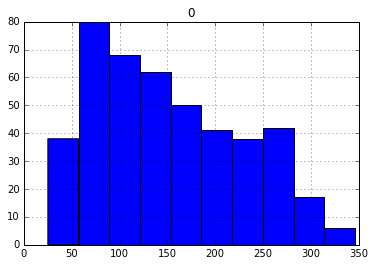

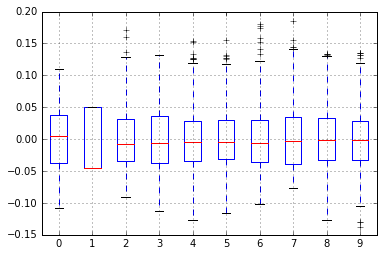

In [16]:
# Load the data
diabetes = datasets.load_diabetes();
# Put it into pandas DataFrames
diabetes_data_df = pd.DataFrame(diabetes.data);
diabetes_target_df = pd.DataFrame(diabetes.target)

# How many attributes and records are there?
print diabetes_data_df.shape

# What are the descriptive statistics?
print diabetes_data_df.describe()
# How are the labels distributed?
diabetes_target_df.hist()

# How are the attributes distributed?
plt.figure()
axes = diabetes_data_df.boxplot()

Notice anything interesting about the data? The attributes have been normalized - each has a similar mean and standard deviation. Now let's train our first regression model.

In [17]:
# First we'll do a simple train-test split:
[dbt_tr_data, dbt_te_data,
 dbt_tr_target, dbt_te_target] = cross_validation.train_test_split(diabetes.data,diabetes.target, random_state=20160202)

# Create the LinearRegression classifier
lr = linear_model.LinearRegression()

# Learn the linear regression model
lr.fit(dbt_tr_data, dbt_tr_target)

# Print out the coefficient of determination (R^2)
print "R^2:\t",lr.score(dbt_te_data,dbt_te_target)

# Peek at the predictions
dbt_te_predict = lr.predict(dbt_te_data)
print dbt_te_predict

# And also the mean squared error:
print "MSE:\t", metrics.mean_squared_error(dbt_te_target, dbt_te_predict)

# Which attributes were important to this prediction? We can find out by looking at the attribute weights:
print lr.coef_

R^2:	0.533716155537
[ 124.87699265  241.04779116  239.55002222  262.61331893  245.76075935
  215.38130957   98.25024738  167.10341193   86.15467868  149.23130648
  139.44688429  121.07843815  145.93392542  113.89242688  137.00001959
  106.07596308  188.8720697   151.64642212  147.17548161  193.9762092
  193.24395545  123.38347892  244.93128416  221.35017651   73.23177137
  175.0689274   270.81318019   76.43093304  147.64128689  106.93226173
   72.18329933  246.22062792  155.49372733  132.93631466  122.1416297
   70.14373998  182.1432308   259.16039335  119.69523429  217.32224665
  156.87184212  209.45289148  152.68147644   97.91484124   99.47991166
   60.35999351  163.47427462  175.63241326  165.73475646  120.17137496
  143.1380446    65.50402188  161.25927147  165.59617116  127.56318762
  145.47983532  119.2772516   140.89228502  138.44957973  234.27031641
   70.42410076  219.75216763   96.49453974  169.97467564   75.49176572
  141.43569069  146.08650475   97.22882088  235.72934302  1

Hopefully you can see the similarities between how to build a [LinearRegression model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) and the previous assignment on DecisionTrees.  The big difference is that the predictions are not classes, but continuous values (much like the training targets). One consequence is that we can't use the same metrics for regression and classification. One metric that we've discussed (and that linear regression attempts to minimize directly) is the [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) or MSE. If you understand how the MSE works, the leap to the default metric that regression reports (via the `.score()` function) -- the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R^2) -- shouldn't be too hard to understand. Read about the R^2 metric and make sure you understand what it measures.

The above example used a simple train-test split, but we can be more confident of our conclusions if we perform cross-validation. Let's use cross-validation to experiment with the same dataset and take a look at the results. Note that this example provides you with some tricks that you might have missed in the last assignment, so understanding the code below and learning to use it should be helpful

In [18]:
foldnum = 0
fold_results = pd.DataFrame()
for train, test in cross_validation.KFold(len(diabetes.data), n_folds=10):
    foldnum+=1
    [dbt_tr_data, dbt_te_data,
     dbt_tr_target, dbt_te_target] = folds_to_split(diabetes.data,diabetes.target,train,test)

    lr = linear_model.LinearRegression()
    lr.fit(dbt_tr_data, dbt_tr_target)
    # We could print out our results
    print "Fold %d\t\t R^2 metric = %03.3f \t\t MSE = %03.1f " % (foldnum,  
                                                                  lr.score(dbt_te_data,dbt_te_target), 
                                                                  metrics.mean_squared_error(dbt_te_target, 
                                                                                             lr.predict(dbt_te_data))
                                                                 )
    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = lr.score(dbt_te_data, dbt_te_target)
    fold_results.loc[foldnum, 'MSE'] = metrics.mean_squared_error(dbt_te_target, lr.predict(dbt_te_data))

    # By the way, if you were searching over parameters in an inner for loop, 
    # you could store those in your results DataFrame just as easily, for example:
    # for param in params.keys():
    #    for paramVal in params[param]:
    #        paramDict={}; 
    #        paramDict[param]=paramVal
    #        dtree = tree.DecisionTreeClassifier(random_state=20160121, **paramDict)
    #        dtree.fit(mushroom_train,mushroom_train_labels)
    #        fold_results.loc[foldnum,'%s=%s' % (param, paramVal)]=dtree.score(mushroom_val,mushroom_val_labels)
    
#Now let's look at the results:
print fold_results
#And compute the mean error across folds:
print fold_results.mean()

Fold 1		 R^2 metric = 0.556 		 MSE = 2533.8 
Fold 2		 R^2 metric = 0.231 		 MSE = 2870.8 
Fold 3		 R^2 metric = 0.354 		 MSE = 3512.7 
Fold 4		 R^2 metric = 0.622 		 MSE = 2759.2 
Fold 5		 R^2 metric = 0.266 		 MSE = 3555.7 
Fold 6		 R^2 metric = 0.618 		 MSE = 2900.4 
Fold 7		 R^2 metric = 0.418 		 MSE = 3696.3 
Fold 8		 R^2 metric = 0.435 		 MSE = 2282.3 
Fold 9		 R^2 metric = 0.434 		 MSE = 4122.9 
Fold 10		 R^2 metric = 0.686 		 MSE = 1769.7 
         R^2          MSE
1   0.556144  2533.848109
2   0.230561  2870.767711
3   0.353578  3512.723509
4   0.621905  2759.227129
5   0.265876  3555.677943
6   0.618193  2900.380412
7   0.418159  3696.281878
8   0.435152  2282.279598
9   0.434370  4122.939981
10  0.685685  1769.684057
R^2       0.461962
MSE    3000.381033
dtype: float64


# Question 1: Linear Regression, Ridge Regression and Lasso (20 points)
Now it's your turn to perform a linear regression experiment! Use the [Boston Housing Prices Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) built into scikit-learn to better understand regression. You can load it with `datasets.load_boston()` and use the `.DESCR` field to learn more about the dataset.
1.   Perform exploratory data analysis on the Boston Housing data.
    * From your exploratory data analysis, what do you notice about the attribute values? 
    * Which parameter to the `LinearRegression` model could you use to deal with this issue? 
    * Perform 10-fold cross-validation (with `shuffle=True` and `random_state=20160202`) with a `LinearRegression` model that uses the parameter identified above. Report the average coefficient of determination and mean squared error metric on the test set (averaged across folds).

2.   Two very popular options in Linear Regression are the [Lasso method](https://en.wikipedia.org/wiki/Lasso_(statistics)) and [Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization). These are implemented in the [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) and [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) models in sklearn.
   * What *one word* captures what Lasso and Ridge do? (It's in the first sentence of both Wikipedia articles and sklearn documentation pages)
   * Perform 10-fold CV with normal `LinearRegression`, `Lasso`, and `Ridge`. Compare the attribute weights (`coef_`) of each of these methods. What do you observe? 
   * Report the average R^2 and MSE for each method on the test set across folds. How do these variants of linear regression perform?
   
   Hint: If you'd like to understand Ridge Regression better, you might want to look at this [example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html)


<h1> Answers 1: </h1>
<h3>1.</h3>
<p>
<b>a)</b> From the exploratory data analysis, we noticed that the range of the values is huge, which is not good. For example, most of the attributes have a value below 100, while the 9th and 11th attribute have values in the hundreds. Betewen 300 and 700 for the 9th attribute [TAX] and around 400 for the 11th attribute [B] <br>
<b>b)</b> To deal with this issue, we'll use the normalize=True parameter to the LinearRegression model<br>
<b>c)</b> Averages: <br>
    R^2     0.713643 <br>
    MSE    23.657502 <br>

</p>

<h3>2. </h3>
<p>
<b>a)</b> Regularization. Both Lasso and Ridge regression are used for regularization to prevent overfitting <br>
<b>b)</b> Looking at the attribute weights, we see several differences between the different models. <br>
First, Lasso gets completly rid of most features, by settings the weights of 0. It only keeps 2 or 3 features in most cases as the only relevant once to predict the median house price<br>
The Ridge regression model on the other hand, keeps most features, but we can notice that the weights are 
slightly different to the weights of the original linear regresion (i.e there are only small changes to the weights). <br>
<br>
<b>c)</b> <br>
Averages: <br>
Linear Regression:<br>
R^2     0.713643<br>
MSE    23.657502<br>
<br>
Lasso Regularization:<br>
R^2     0.580869<br>
MSE    35.198977<br>
<br>
Ridge Regression: <br>
R^2     0.708486<br>
MSE    24.133678<br>

<br>
TTest for LinearRegression vs RidgeRegression<br>
Ttest_relResult(statistic=1.2154248843325626, pvalue=0.25512413165702003)<br>
<br>

TTest for Lasso vs RidgeRegression<br>
Ttest_relResult(statistic=-9.4005571317290304, pvalue=5.9711873467613727e-06)<br>
<br>

TTest for LinearRegression vs Lasso<br>
Ttest_relResult(statistic=8.7799598190605064, pvalue=1.0449626130453215e-05)<br>
<br>

The Lasso regression model performs significantly worse than the linear regression and the ridge regression model. This means that the model is not overfitted, and most features are relevant to predicting the median house prices. So when Lasso gets rid of some features, the model performs worse. <br> 
The Ridge regression performs slightly worse than the regular linear regression, but according to the ttest, this difference is not significant. 

In [19]:
# Load the data
boston = datasets.load_boston();

# Brief description of the data
print boston.DESCR


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

(506, 13)
               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

/Users/viktorjankov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


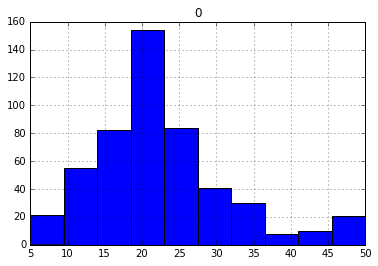

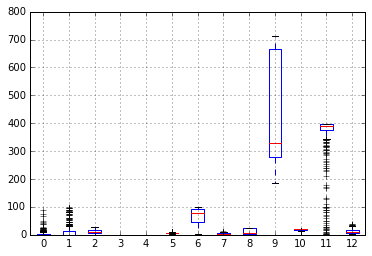

In [20]:
# Part 1a) Explore the dataset
# Put it into pandas DataFrames
boston_data_df = pd.DataFrame(boston.data);
boston_target_df = pd.DataFrame(boston.target)

# How many attributes and records are there?
print boston_data_df.shape

# What are the descriptive statistics?
print boston_data_df.describe()

# How are the labels distributed?
boston_target_df.hist()

# How are the attributes distributed?
plt.figure()
axes = boston_data_df.boxplot()

In [21]:
# Part 1b) Cross Validation 
foldnum = 0
fold_results = pd.DataFrame()
for train, test in cross_validation.KFold(len(boston.data), n_folds=10, shuffle=True, random_state=20160202):
    foldnum+=1
    [boston_tr_data, boston_te_data,
     boston_tr_target, boston_te_target] = folds_to_split(boston.data,boston.target,train,test)

    lr = linear_model.LinearRegression(normalize=True)
    lr.fit(boston_tr_data, boston_tr_target)
                                                                 
    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = lr.score(boston_te_data, boston_te_target)
    fold_results.loc[foldnum, 'MSE'] = metrics.mean_squared_error(boston_te_target, lr.predict(boston_te_data))

#Now let's look at the results:
print fold_results
#And compute the mean error across folds:
print fold_results.mean()

         R^2        MSE
1   0.717454  23.926098
2   0.620171  34.779133
3   0.783767  18.841212
4   0.556936  30.379589
5   0.769709  16.603228
6   0.693492  22.287915
7   0.828865  19.256283
8   0.631266  33.237697
9   0.796774  16.961117
10  0.737993  20.302751
R^2     0.713643
MSE    23.657502
dtype: float64


In [22]:
# Part 2 Using Lasso and Ridge Regression

from scipy import stats

foldnum = 0
lr_fold_results = pd.DataFrame()
lasso_fold_results = pd.DataFrame()
ridge_fold_results = pd.DataFrame()

for train, test in cross_validation.KFold(len(boston.data), n_folds=10, shuffle=True, random_state=20160202):
    foldnum+=1
    [boston_tr_data, boston_te_data,
     boston_tr_target, boston_te_target] = folds_to_split(boston.data,boston.target,train,test)

    lr = linear_model.LinearRegression(normalize=True)
    lr.fit(boston_tr_data, boston_tr_target)
    
    lasso = linear_model.Lasso(alpha=0.1, normalize=True, random_state=20160202)
    lasso.fit(boston_tr_data, boston_tr_target)

    ridge = linear_model.Ridge(alpha=0.1, normalize=True, random_state=20160202)
    ridge.fit(boston_tr_data, boston_tr_target)
                                                                 
    # But a nicer way to store them is in a DataFrame
    lr_fold_results.loc[foldnum, 'R^2'] = lr.score(boston_te_data, boston_te_target)
    lr_fold_results.loc[foldnum, 'MSE'] = metrics.mean_squared_error(boston_te_target, lr.predict(boston_te_data))
    
    lasso_fold_results.loc[foldnum, 'R^2'] = lasso.score(boston_te_data, boston_te_target)
    lasso_fold_results.loc[foldnum, 'MSE'] = metrics.mean_squared_error(boston_te_target, lasso.predict(boston_te_data))
    
    ridge_fold_results.loc[foldnum, 'R^2'] = ridge.score(boston_te_data, boston_te_target)
    ridge_fold_results.loc[foldnum, 'MSE'] = metrics.mean_squared_error(boston_te_target, ridge.predict(boston_te_data))
    
#Now let's look at the results:
print "TTest for LinearRegression vs RidgeRegression"
print stats.ttest_rel(lr_fold_results['R^2'].values, ridge_fold_results['R^2'].values)
print "\n"

print "TTest for Lasso vs RidgeRegression"
print stats.ttest_rel(lasso_fold_results['R^2'].values, ridge_fold_results['R^2'].values)
print "\n"

print "TTest for LinearRegression vs Lasso"
print stats.ttest_rel(lr_fold_results['R^2'].values, lasso_fold_results['R^2'].values)
print "\n"


#And compute the mean error across folds:
print "Linear Regression:"
print lr_fold_results.mean()
print "\n"

print "Lasso Regularization:"
print lasso_fold_results.mean()
print "\n"

print "Ridge Regression: "
print ridge_fold_results.mean()

TTest for LinearRegression vs RidgeRegression
Ttest_relResult(statistic=1.2154248843325628, pvalue=0.25512413165702003)


TTest for Lasso vs RidgeRegression
Ttest_relResult(statistic=-9.4005571317290268, pvalue=5.971187346761393e-06)


TTest for LinearRegression vs Lasso
Ttest_relResult(statistic=8.7799598190605046, pvalue=1.0449626130453218e-05)


Linear Regression:
R^2     0.713643
MSE    23.657502
dtype: float64


Lasso Regularization:
R^2     0.580869
MSE    35.198977
dtype: float64


Ridge Regression: 
R^2     0.708486
MSE    24.133678
dtype: float64


# Logistic Regression
Now let's look at a different application for regression algorithms: classification. As we learned in class, regression algorithm can be adapted to a binary classification fairly simply. Instead of predicting some continuous value, we predict the class. So, for example, instead of predicting the diabetes condition of a patient we would predict whether or not a patient has diabetes by having the label be 1 when the patient has diabetes and 0 when the patient does not have diabetes. 

In this setting the regression algorithm tries to learn some combination of features to get 0 for the negative instance and 1 for the positive instances. Of course, linear regression algorithms produce continuous values, not just 1s and 0s, so we have to convert the continuous values into 1s and 0s. Usually this is done by rounding values above 0.5 to 1 and the remaining values to 0 (using, for example, the numpy [round](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.round_.html) function). 

However, there's still something messy about this setting. Linear regression wants to predict continuous values and we're conscripting it to produce 1s and 0s. What if we had a regression algorithm that, by design, predicted 1s and 0s? This is exactly what logistic regression does. Let's look at an example of the difference, taken from the [scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html)

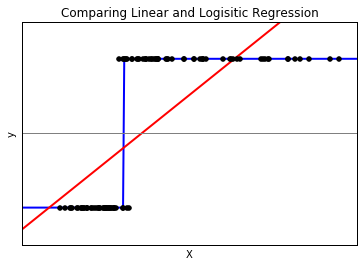

In [23]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

#Learn a Linear Regression model
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Learn a Logistic Regression model
lgr = linear_model.LogisticRegression(C=1e5)
lgr.fit(X, y)

# Plot the training data (as black dots)
plt.scatter(X.ravel(), y, color='black', zorder=20)

#Create some test data
X_test = np.linspace(-5, 10, 300).reshape(300,1)

# Plot the predictions of the logistic regression model (blue line)
plt.plot(X_test, lgr.predict(X_test), color='blue', linewidth=2)

# Plot the prediction of the linear regresion model (red line)
plt.plot(X_test, lr.predict(X_test), color='red', linewidth=2)

# Make the plot prettier
plt.axhline(.5, color='.5')
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(())
plt.yticks(())
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.title('Comparing Linear and Logisitic Regression')
plt.show()

The black dots in the plot above are the training data. The linear regression model fits that training data with the line shown in red. The logistic regression model fits the same training data with the line shown in blue. As you can see, the logistic regression model is a much closer fit to the binary training data than the linear regression model.

Now let's explore logistic regression with a different data set. The [Adult dataset](http://archive.ics.uci.edu/ml/datasets/Adult) consists of 14 attributes from census data and tries to predict whether an individual has an income exceeding $50K. I've covered some of the basic steps to get the data loaded, but you can explore the original data `census_orig` (which has readable, nominal attributes) and the transformed data `census_data` and `census_labels` to get a better understanding of the dataset.

In [24]:
census_data = urllib2.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
census_orig = pd.read_csv(census_data, quotechar='"', skipinitialspace=True, 
                               names=['Age','WorkClass', 'FnlWgt', 'Education', 'EducationYears', 'MaritalStatus', 
                                      'Occupation', 'Relationship', 'Race', 'Sex', 
                                      'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 
                                      'NativeCountry', 'Label'],
                               na_values="?", index_col=False)

census_orig = census_orig.dropna()

# Convert labels from strings to boolean
label_encoder = preprocessing.LabelEncoder()
census_labels = pd.DataFrame(label_encoder.fit_transform(census_orig.iloc[:,-1]))

# Convert nominal attributes to encoded versions
attr_encoder = feature_extraction.DictVectorizer(sparse=False)
census_data = pd.DataFrame(attr_encoder.fit_transform(census_orig.iloc[:,:-1].T.to_dict().values()))
census_data.columns = attr_encoder.get_feature_names()


## Question 2: Logistic Regression (20 points)
1. Learn linear and logistic regression classifiers for the census data. Perform 10-fold cross-validation (with `shuffle=True` and `random_state=20160202`) and report the mean accuracy of each classifier. Remember, you have to transform the linear regression result to get a classification.
2. One of the important aspects data mining is data normalization. Use the `StandardScaler` to normalize your data. Now re-run the same 10-fold experiment for both classifiers. What changed? 
3. The Lasso and Ridge methods above are also part of logistic regression, although you must specify them slightly differently. You can specify the parameter `penalty='l1'` or `penalty='l2'` to specify Lasso or Ridge, respectively. The importance of regularization can be specified using the parameter C. Perform 10-fold CV with the L1 and L2 penalties and C=[0.1, 10]. Report the results of each combination (for a total of 4) averaged across folds.

Note: if this were a real experiment, you would want to do your parameter search with a validation set.

<h1> Answers 2: </h1>
<h3>1.</h3>
<p>
Linear Regression Mean Accuracy    0.833996 <br>
Logistic Regression Accuracy       0.790465 <br>
</p>
<h3>2.</h3>
<p> The accuracies changed between the two models. Now with the data normalized, the Logistic Regression performs better than the Linear Regression, whereas in the original, non-standardized data, the reverse was true. It's worthy to note that the accuracy of the Logistic Regression improved significanlty ~5% <br>
<br>
Linear Regression Mean Accuracy    0.833864 <br>
Logistic Regression Accuracy       0.848551 <br>
</p>
<h3>3. </h3>
Lasso Log Regression <br>
L1 0.1:     0.848087 <br>
L1 10:     0.848551 <br> <br>
Ridge Log Regression: <br>
L2 0.1:     0.848485 <br>
L2 10:     0.848551 <br>


In [25]:
# Part 1 no normalization
from sklearn.metrics import accuracy_score

#maybe do your EDA here?
foldnum = 0
lr_fold_results = pd.DataFrame()
lgr_fold_results = pd.DataFrame()

for train, test in cross_validation.KFold(len(census_data), n_folds=10, shuffle=True, random_state=20160202):
    foldnum+=1

    [adult_tr_data, adult_te_data,
     adult_tr_target, adult_te_target] = folds_to_split(census_data,census_labels,train,test)

    lr = linear_model.LinearRegression()
    lr.fit(adult_tr_data, adult_tr_target)
    
    prediction = lr.predict(adult_te_data)
    classified_prediction = []
    for value in range(len(prediction)):
        classified_prediction.append(round(prediction[value]))
    adult_te_classified_data = pd.DataFrame(classified_prediction)

    lgr = linear_model.LogisticRegression(C=1e5)
    lgr.fit(adult_tr_data, np.reshape(adult_tr_target.values,[len(adult_tr_target),]))

    # But a nicer way to store them is in a DataFrame
    lr_fold_results.loc[foldnum, 'LinearReg Mean Accuracy'] = accuracy_score(adult_te_target, adult_te_classified_data) 
    lgr_fold_results.loc[foldnum, 'LogRegr Accuracy'] = lgr.score(adult_te_data, adult_te_target)
    
#Now let's look at the results:
print lr_fold_results
#And compute the mean error across folds:
print lr_fold_results.mean()

print lgr_fold_results
print lgr_fold_results.mean()

    LinearReg Mean Accuracy
1                  0.840570
2                  0.833941
3                  0.834881
4                  0.839523
5                  0.830902
6                  0.831565
7                  0.834218
8                  0.827586
9                  0.832560
10                 0.834218
LinearReg Mean Accuracy    0.833996
dtype: float64
    LogRegr Accuracy
1           0.783560
2           0.790520
3           0.797082
4           0.802056
5           0.781167
6           0.790119
7           0.793103
8           0.783820
9           0.784483
10          0.798740
LogRegr Accuracy    0.790465
dtype: float64


In [26]:
# Part 2 normalizing the data
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
census_data_norm = pd.DataFrame(sscaler.fit_transform(census_data.values))

#maybe do your EDA here?
foldnum = 0
lr_fold_results = pd.DataFrame()
lgr_fold_results = pd.DataFrame()

for train, test in cross_validation.KFold(len(census_data_norm), n_folds=10, shuffle=True, random_state=20160202):
    foldnum+=1

    [adult_tr_data, adult_te_data,
     adult_tr_target, adult_te_target] = folds_to_split(census_data_norm,census_labels,train,test)

    lr = linear_model.LinearRegression()
    lr.fit(adult_tr_data, adult_tr_target)
    
    prediction = lr.predict(adult_te_data)
    classified_prediction = []
    for value in range(len(prediction)):
        classified_prediction.append(round(prediction[value]))
    adult_te_classified_data = pd.DataFrame(classified_prediction)

    lgr = linear_model.LogisticRegression(C=1e5)
    lgr.fit(adult_tr_data, np.reshape(adult_tr_target.values,[len(adult_tr_target),]))

    # But a nicer way to store them is in a DataFrame
    lr_fold_results.loc[foldnum, 'LinearReg Mean Accuracy'] = accuracy_score(adult_te_target, adult_te_classified_data) 
    lgr_fold_results.loc[foldnum, 'LogRegr Accuracy'] = lgr.score(adult_te_data, adult_te_target)
    
#Now let's look at the results:
print lr_fold_results
#And compute the mean error across folds:
print lr_fold_results.mean()

print lgr_fold_results
print lgr_fold_results.mean()

    LinearReg Mean Accuracy
1                  0.842559
2                  0.832615
3                  0.835212
4                  0.839191
5                  0.830570
6                  0.831233
7                  0.832560
8                  0.826260
9                  0.832891
10                 0.835544
LinearReg Mean Accuracy    0.833864
dtype: float64
    LogRegr Accuracy
1           0.857474
2           0.846536
3           0.855106
4           0.852122
5           0.842838
6           0.845159
7           0.852122
8           0.838196
9           0.848806
10          0.847149
LogRegr Accuracy    0.848551
dtype: float64


In [27]:
# Part 3 Lasso and Ridge using Logistic Regression
foldnum = 0
fold_l1_01_results = pd.DataFrame()
fold_l1_10_results = pd.DataFrame()

fold_l2_01_results = pd.DataFrame()
fold_l2_10_results = pd.DataFrame()


for train, test in cross_validation.KFold(len(census_data_norm), n_folds=10, shuffle=True, random_state=20160202):
    foldnum+=1

    [adult_tr_data, adult_te_data,
     adult_tr_target, adult_te_target] = folds_to_split(census_data_norm,census_labels,train,test)

    lgr_l1_01 = linear_model.LogisticRegression(penalty = 'l1', C=0.1)
    lgr_l1_10 = linear_model.LogisticRegression(penalty = 'l1', C=10)
    lgr_l2_01 = linear_model.LogisticRegression(penalty = 'l2', C=0.1)
    lgr_l2_10 = linear_model.LogisticRegression(penalty = 'l2', C=10)
    
    lgr_l1_01.fit(adult_tr_data, np.reshape(adult_tr_target.values,[len(adult_tr_target),]))
    lgr_l1_10.fit(adult_tr_data, np.reshape(adult_tr_target.values,[len(adult_tr_target),]))
    
    lgr_l2_01.fit(adult_tr_data, np.reshape(adult_tr_target.values,[len(adult_tr_target),]))
    lgr_l2_10.fit(adult_tr_data, np.reshape(adult_tr_target.values,[len(adult_tr_target),]))

    # But a nicer way to store them is in a DataFrame
    fold_l1_01_results.loc[foldnum, 'L1 0.1: '] = lgr_l1_01.score(adult_te_data, adult_te_target)
    fold_l1_10_results.loc[foldnum, 'L1 10: '] = lgr_l1_10.score(adult_te_data, adult_te_target)
    
    fold_l2_01_results.loc[foldnum, 'L2 0.1: '] = lgr_l2_01.score(adult_te_data, adult_te_target)
    fold_l2_10_results.loc[foldnum, 'L2 10: '] = lgr_l2_10.score(adult_te_data, adult_te_target)


#And compute the mean error across folds:
print fold_l1_01_results.mean()
print fold_l1_10_results.mean()
print fold_l2_01_results.mean()
print fold_l2_10_results.mean()

L1 0.1:     0.848087
dtype: float64
L1 10:     0.848551
dtype: float64
L2 0.1:     0.848485
dtype: float64
L2 10:     0.848551
dtype: float64
